In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


EDA


<Axes: xlabel='age', ylabel='Count'>

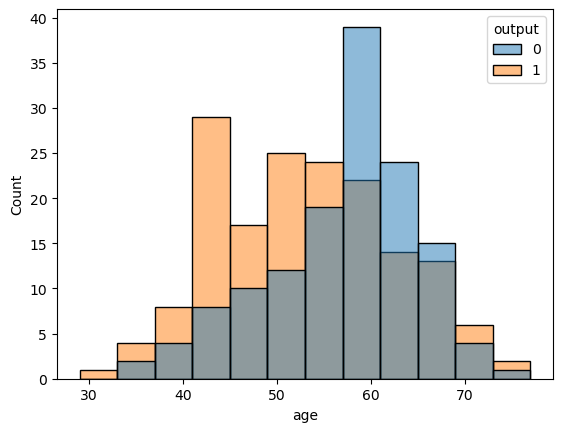

In [11]:
sns.histplot(data =df, x ='age', hue = 'output')

In [13]:
df.groupby(['output'])['age'].mean()
# Counterintuitive here - more likely to have a heart attack is on average younger than those who are less likely!

output
0    56.601449
1    52.496970
Name: age, dtype: float64

In [14]:
df['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [19]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [22]:
df.count()

age         303
sex         303
cp          303
trtbps      303
chol        303
fbs         303
restecg     303
thalachh    303
exng        303
oldpeak     303
slp         303
caa         303
thall       303
output      303
dtype: int64

In [24]:
df.isna().sum()
# No null values

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Base Model

In [26]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [29]:
# Remove the columns not described in kaggle

df = df.drop(['slp', 'caa', 'thall'], axis = 1).copy()

In [30]:
# split X and y

X = df.drop('output', axis = 1)
y = df['output']

X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak
0,63,1,3,145,233,1,0,150,0,2.3
1,37,1,2,130,250,0,1,187,0,3.5
2,41,0,1,130,204,0,0,172,0,1.4
3,56,1,1,120,236,0,1,178,0,0.8
4,57,0,0,120,354,0,1,163,1,0.6


In [39]:
# train test split

from sklearn.model_selection import train_test_split

X_test, X_train, y_test, y_train = train_test_split(X, y, train_size = 0.2)

In [43]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000) #Updated max iter since failed to converge in gradient descent otherwise 
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [45]:
y_predict_train = lr.predict(x_train)
y_predict_test = lr.predict(x_test)

<Axes: >

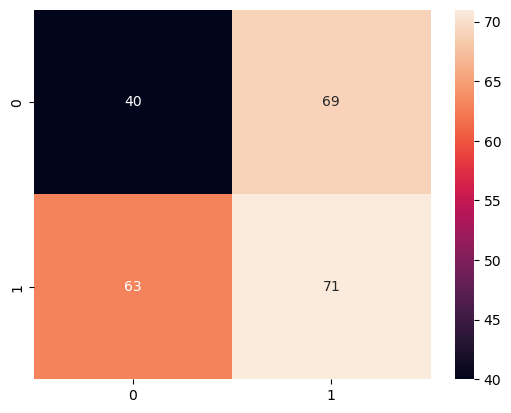

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

<Axes: >

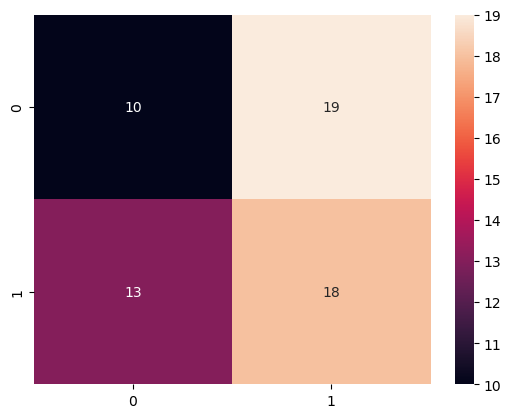

In [48]:
cm2 = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm2, annot=True)

In [49]:
accuracy_score(y_test, y_predict_test)

0.4666666666666667

In [51]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.43      0.34      0.38        29
           1       0.49      0.58      0.53        31

    accuracy                           0.47        60
   macro avg       0.46      0.46      0.46        60
weighted avg       0.46      0.47      0.46        60



Improved model (one hot encoding, scaling, feature engineering)

In [52]:
df['cp'].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

In [53]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'output'],
      dtype='object')

In [54]:
df['exng'].value_counts()

exng
0    204
1     99
Name: count, dtype: int64

In [55]:
# Categorical columns: cp (chest pain type), fbs (fast blood sugar - binary), restecg (resting electrocardiographic results - binary)

In [63]:
df = pd.get_dummies(df, columns = ['cp'], drop_first = True)
df.head()

,age,sex,trtbps,chol,restecg,thalachh,oldpeak,output,cp_1,cp_2,cp_3,fbs_1,exng_1
0,63,1,145,233,0,150,2.3,1,False,False,True,True,False
1,37,1,130,250,1,187,3.5,1,False,True,False,False,False
2,41,0,130,204,0,172,1.4,1,True,False,False,False,False
3,56,1,120,236,1,178,0.8,1,True,False,False,False,False
4,57,0,120,354,1,163,0.6,1,False,False,False,False,True


In [76]:
df[['cp_1', 'cp_2', 'cp_3', 'fbs_1', 'exng_1']] = df[['cp_1', 'cp_2', 'cp_3']].astype(int)

In [77]:
df.head()

,age,sex,trtbps,chol,restecg,thalachh,oldpeak,output,cp_1,cp_2,cp_3,fbs_1,exng_1
0,63,1,145,233,0,150,2.3,1,0,0,1,1,0
1,37,1,130,250,1,187,3.5,1,0,1,0,0,0
2,41,0,130,204,0,172,1.4,1,1,0,0,0,0
3,56,1,120,236,1,178,0.8,1,1,0,0,0,0
4,57,0,120,354,1,163,0.6,1,0,0,0,0,1


In [102]:
from sklearn.preprocessing import StandardScaler

st = StandardScaler()
df[['age', 'trtbps','chol','thalachh', 'oldpeak']] = st.fit_transform(df[['age', 'trtbps','chol','thalachh', 'oldpeak']])

/Users/rohan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


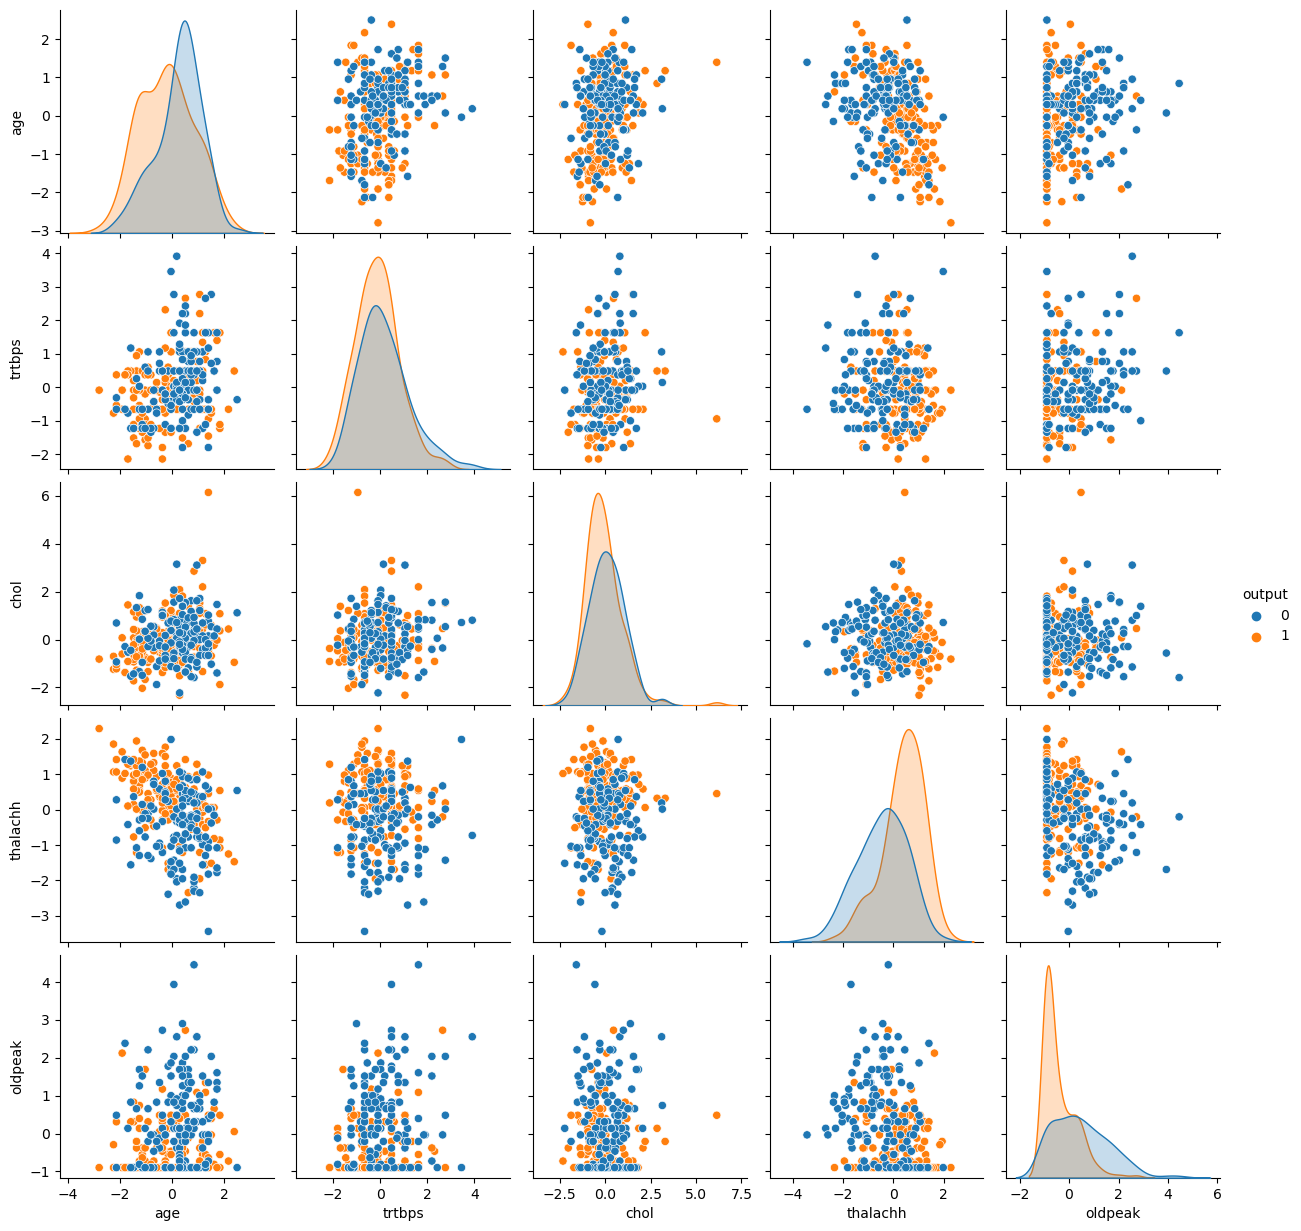

In [103]:
sns.pairplot(df[['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output']], hue = 'output')

#Checking for any additional EDA and feature engineering that can be done. Nothing obvious stands out.

<Axes: >

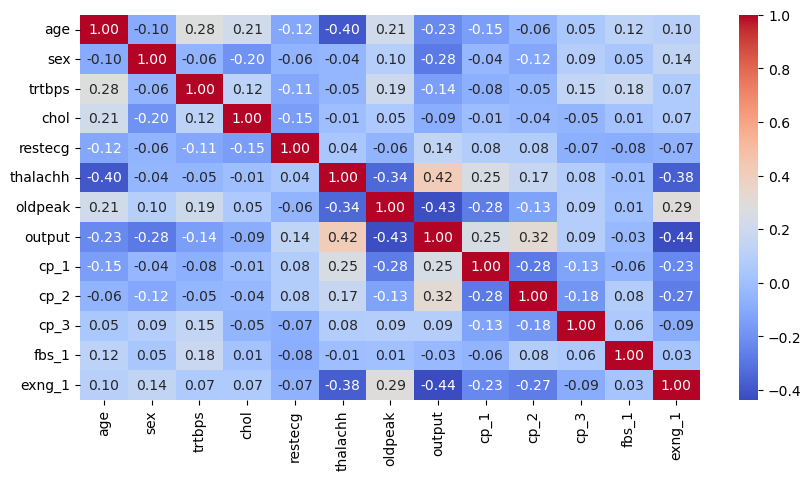

In [104]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

# No multicolinearity so no variables need to be removed 

In [93]:
# Test new model

<Axes: >

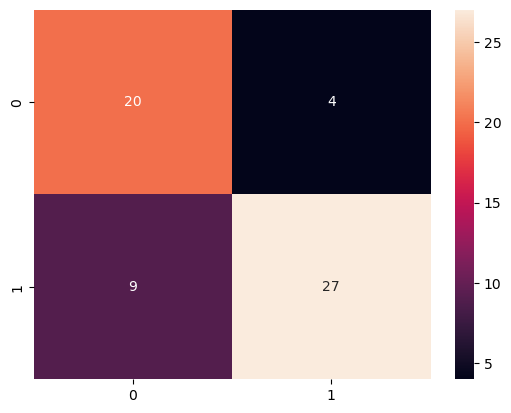

In [105]:
X1 = df.drop('output', axis = 1)
y1 = df['output']

X_test1, X_train1, y_test1, y_train1 = train_test_split(X1, y1, train_size = 0.2)

lr2 = LogisticRegression(max_iter=1000) #Updated max iter since failed to converge in gradient descent otherwise 
lr2.fit(X_train1, y_train1)

y_predict_train1 = lr2.predict(X_train1)
y_predict_test1 = lr2.predict(X_test1)

cmx = confusion_matrix(y_test1, y_predict_test1)
sns.heatmap(cmx, annot=True)

In [106]:
accuracy_score(y_test1, y_predict_test1)

0.7833333333333333

In [107]:
print(classification_report(y_test1, y_predict_test1))

              precision    recall  f1-score   support

           0       0.69      0.83      0.75        24
           1       0.87      0.75      0.81        36

    accuracy                           0.78        60
   macro avg       0.78      0.79      0.78        60
weighted avg       0.80      0.78      0.79        60



In [100]:
# One-hot encoding and scaling drastically improved the accuracy

Hyperparameter tuning

In [109]:
from sklearn.model_selection import GridSearchCV

In [120]:
lr3 = LogisticRegression(max_iter=1000)

param_grid = {
    'C' : [0.1, 1, 10, 100],
}

gscv = GridSearchCV(lr3, param_grid, cv = 5, scoring='accuracy')
gscv.fit(X_train1, y_train1)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 1, 10, 100]}, scoring='accuracy')

In [121]:
gscv.best_params_

{'C': 10}

In [122]:
gscv.best_score_

0.7981292517006803

In [ ]:
# Rose slightly more to 79.8%

In [108]:
'''
Other things that could have been done:
- Further feature engineering (i.e. polynomial, combining different variables, etc.)
- Regularization
'''

'\nOther things that could have been done:\n- Further feature engineering (i.e. polynomial, combining different variables, etc.)\n- Regularization\n'